In [1]:
#This script creates a weighted network for the 6 main characters in Friends for each season.
#The network is based on the characters appearance in a scene. 
#If two charactars appears in the same scene, an edge is created. 

import pandas as pd
import csv
import requests
import re
import numpy
#import nltk
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import urllib

In [2]:
df = pd.read_csv('C:/Users/lass_/Desktop/Socialgrafer/project_v2/All_Friends_data.csv')
df=df.drop(columns='Unnamed: 0')

#A list of al unique episodes, seperated by seasons.
l=list(np.unique(df.Episode))
seasons = []
seasons.append(l[9:10]+l[18:41])
seasons.append(l[41:64])
seasons.append(l[64:89])
seasons.append(l[89:112])
seasons.append(l[112:135])
seasons.append(l[135:158])
seasons.append(l[158:181])
seasons.append(l[181:204])
seasons.append(l[204:227])
seasons.append(l[0:9]+l[10:18])

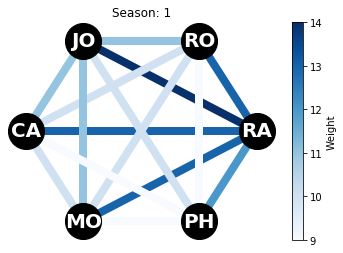

<Figure size 3600x1440 with 0 Axes>

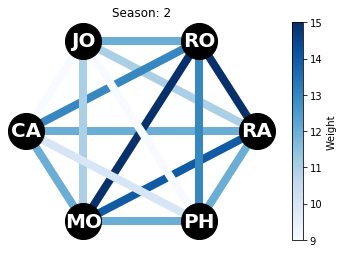

<Figure size 3600x1440 with 0 Axes>

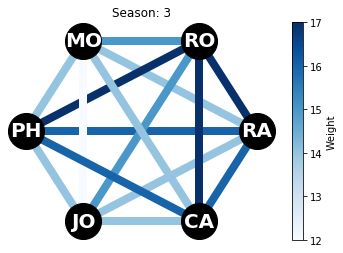

<Figure size 3600x1440 with 0 Axes>

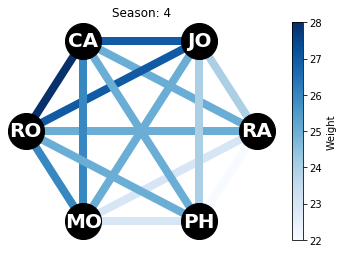

<Figure size 3600x1440 with 0 Axes>

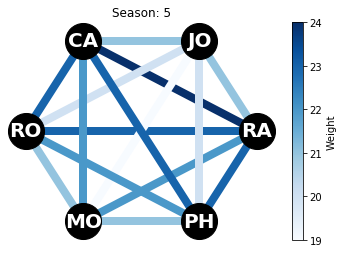

<Figure size 3600x1440 with 0 Axes>

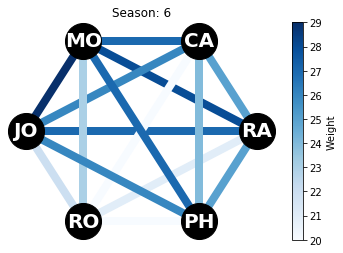

<Figure size 3600x1440 with 0 Axes>

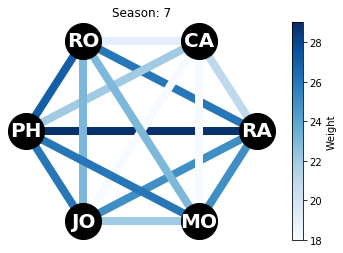

<Figure size 3600x1440 with 0 Axes>

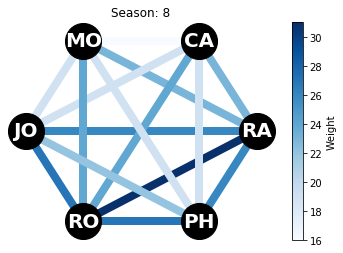

<Figure size 3600x1440 with 0 Axes>

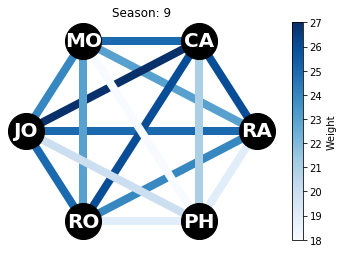

<Figure size 3600x1440 with 0 Axes>

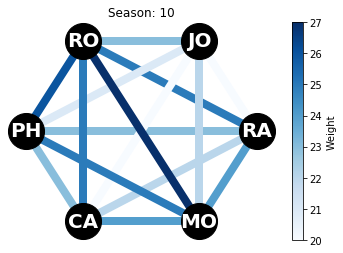

<Figure size 3600x1440 with 0 Axes>

In [5]:
k = 0
for season in seasons:
    
    k = k + 1
    SeasonName = ('Season: '+str(k))
    
    char = ['rachel','joey','chandler','ross','monica','phoebe']
    G = nx.Graph()

    #Creates a dataframe for all episodes in the season.
    for i in season:
        temp=df[df.Episode == i]
    
    #Finds all the unique scenes.
    scenes=list(np.unique(temp.Scene))

    
    for i in scenes:
        #Finds all the speaker in the scene.
        tempscene=list(np.unique(temp[temp.Scene == i].Speaker))

        for c1 in char:
            for c2 in char:
                if (c1 != c2):
                    
                    #Checks if the two characters are in the scene and add an edge (or increases the weight)
                    if (c1 and c2 in tempscene):
                        if G.has_edge(c1,c2):
                            w = G[c1][c2]['weight']
                            G.add_edge(c1,c2,weight = w + 1)    
                        else:
                            G.add_edge(c1,c2,weight = 1)
    
    #Borring ploting stuff..
    mapping = {'rachel': 'RA','joey': 'JO','chandler': 'CA','ross': 'RO','monica': 'MO','phoebe': 'PH'}
    G = nx.relabel_nodes(G, mapping)

    pos=nx.circular_layout(G)

    S=nx.get_edge_attributes(G,'weight')
    S=list(S.values())

    edges=nx.draw_networkx_edges(G, pos, width=8, alpha=1, edge_color=S, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_nodes(G, pos, node_size=1300,node_color='black',labels=True)
    nx.draw_networkx_labels(G,pos=pos,font_color='white',font_weight='bold',font_size=20)

    plt.axis('off')
    plt.title(label=SeasonName)
    plt.colorbar(edges,label='Weight')
    plt.figure(figsize=(50,20))
    plt.show()